In [1]:
! pip install darts

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
series_yahoo_stock = pd.read_csv('/content/yahoo_stock.csv')
series_yahoo_stock = series_yahoo_stock.drop(columns= ["High","Low","Open","Volume","Adj Close"] )

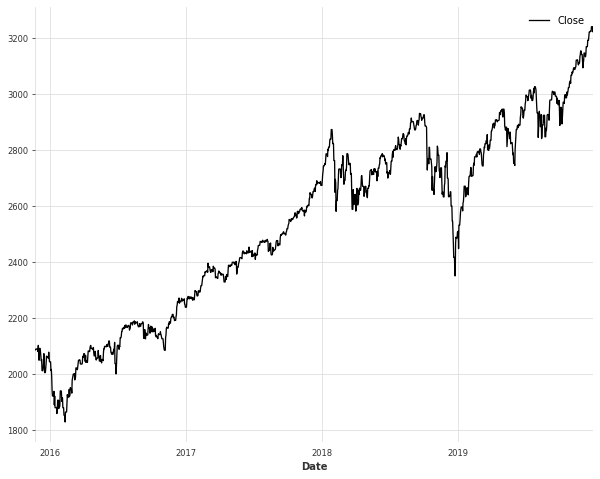

In [13]:
import datetime
#CHANGING THE DATE COLUMN TO DATA TYPE
series_yahoo_stock.Date = pd.to_datetime((series_yahoo_stock['Date']))
#SELECTING ONLY THE DATES BEFORE 2020 DUE TO THE PANAMEIC
series_yahoo_stock = series_yahoo_stock[~(series_yahoo_stock['Date'] > '2019-12-31')]
#PLOT OUR DATA 
series_yahoo_stock.set_index('Date', inplace = True)
#plot the DATA
series_yahoo_stock.plot(label='THE DATA')
plt.rcParams['figure.figsize'] = [10, 8]
fig1 = plt.gcf()
plt.legend();


In [14]:
series_yahoo_stock.head()

,Close
Date,
2015-11-23,2086.590088
2015-11-24,2089.139893
2015-11-25,2088.870117
2015-11-26,2088.870117
2015-11-27,2090.110107


In [15]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
#DEFINE OUR TIMESERIES ON THE DATAFRAME WE HAVE
series_closing_scaler = TimeSeries.from_dataframe(series_yahoo_stock)
#SPLIT THE DATA TO TRIAING AND TESTING, WE GIVE 6 MONTH FOR TESTING         
train_closing_stock, val__closing_stock = series_closing_scaler.split_after(pd.Timestamp('20190630'))

In [20]:
from darts.models import  NBEATSModel
from darts.metrics import mape
#DEFINING THE MODEL 
NBEATS_MODEL = NBEATSModel(input_chunk_length = 30, output_chunk_length =7 , n_epochs=100, random_state=0)
#give the .fit method the training series and the validation series
NBEATS_MODEL.fit(train_closing_stock,val_series = val__closing_stock, verbose=True)
#get the predictions for the next TESTING DATA, 6 MONTH = 360 DAYS 
pred_closing = NBEATS_MODEL.predict(n=360, series = train_closing_stock  )
#get the error using the mape
pred_error = mape(val__closing_stock[:360],pred_closing)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the closing price:",pred_error )

[2022-01-04 18:15:34,424] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1280 samples.
[2022-01-04 18:15:34,424] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1280 samples.
[2022-01-04 18:15:34,514] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-04 18:15:34,514] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 1/100 [00:07<13:05,  7.94s/it]

 11%|█         | 11/100 [01:26<11:40,  7.87s/it]

 21%|██        | 21/100 [02:44<10:19,  7.84s/it]

 31%|███       | 31/100 [04:03<09:04,  7.89s/it]

 41%|████      | 41/100 [05:21<07:45,  7.88s/it]

 51%|█████     | 51/100 [06:40<06:28,  7.93s/it]

 61%|██████    | 61/100 [07:59<05:06,  7.86s/it]

 71%|███████   | 71/100 [09:18<03:48,  7.87s/it]

 81%|████████  | 81/100 [10:36<02:28,  7.84s/it]

 91%|█████████ | 91/100 [11:54<01:10,  7.86s/it]

100%|██████████| 100/100 [13:04<00:00,  7.85s/it]


this is the error for the closing price: 7.686306663122982
